In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
data = pd.read_csv('Position_Salaries.csv')
index = {'Business Analyst': 0, 'Junior Consultant': 1, 'Senior Consultant': 2, 'Manager': 3, 'Country Manager': 4, 'Region Manager': 5, 'Partner': 6, 'Senior Partner': 7, 'C-level': 8, 'CEO': 9}
data['Position'] = data['Position'].map(index)
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [37]:
y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [38]:
data.corr()

,Position,Level,Salary
Position,1.000000,1.000000,0.817949
Level,1.000000,1.000000,0.817949
Salary,0.817949,0.817949,1.000000


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = regressor.predict(X_test)

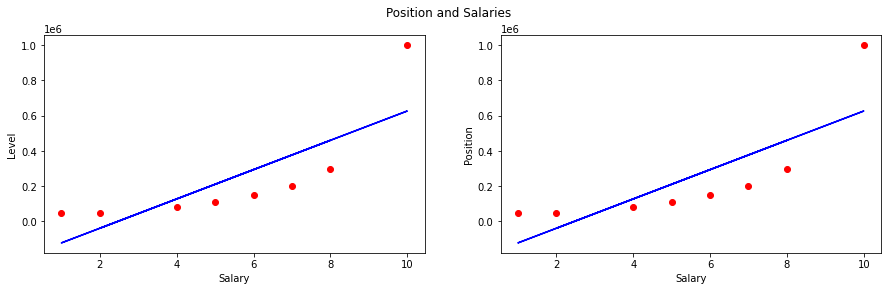

In [44]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.xlabel('Salary')
plt.ylabel('Level')

plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.xlabel('Salary')
plt.ylabel('Position')

plt.suptitle('Position and Salaries')
plt.show()

In [47]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[ 44275.93  60000.  ]
 [543473.58 500000.  ]]


In [51]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9779215014976274